In [1]:
import xarray as xr
import numpy as np
from matplotlib import pyplot as plt

In [2]:
path_dataset = "/home/jvillarreal/Documents/phd/dataset"
path_out = "/home/jvillarreal/Documents/phd/output"


path_ICON = path_dataset + "/data_rttov_T12_dropupbottom_Reff.nc"
rttov_path_refl_emmis = path_out+ "/output-rttov/rttov-131-data-icon-1to19-26-T12.nc"
rttov_path_rad = path_out + "/output-rttov/rttov-13-data-icon-1-to-36-not-flip.nc"

In [3]:
path_rttov_test = path_out + "/output-rttov/rttov-131-data-icon-1to36-T09.nc"
# path_ICON_test = "/home/jvillarreal/Documents/phd/dataset/data_rttov_T09_dropupbottom_Reff.nc"

In [4]:
ds = xr.open_dataset(path_ICON).compute()


In [5]:
ds

<xarray.Dataset>
Dimensions:       (lat: 628, lon: 589, height: 150)
Coordinates:
  * height        (height) float64 1.0 2.0 3.0 4.0 ... 147.0 148.0 149.0 150.0
  * lat           (lat) float64 47.6 47.61 47.62 47.63 ... 54.47 54.48 54.5
  * lon           (lon) float64 4.5 4.517 4.534 4.551 ... 14.45 14.46 14.48 14.5
Data variables: (12/20)
    FR_LAND       (lat, lon) float32 1.0 1.0 1.0 1.0 1.0 ... 0.0 0.0 0.0 0.0 0.0
    clc           (height, lat, lon) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    cli           (height, lat, lon) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    clw           (height, lat, lon) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    clwvi         (lat, lon) float32 0.0 0.0 0.0 ... 0.01189 0.08231 0.05542
    hus           (height, lat, lon) float32 3.905e-06 3.905e-06 ... 0.003561
    ...            ...
    u_10m         (lat, lon) float32 -3.281 -2.992 -3.662 ... -4.05 -3.904
    v_10m         (lat, lon) float32 -3.609 -2.783 1.22 ... -2.379 -2.408 -2.562
    lwp           (lat, lon) float32 0.0 0.0 0.0 9.863 ... 11.89 82.31 55.42
    Nd_max        (lat, lon) float64 0.0 0.0 0.0 12.24 ... 90.85 99.57 183.2
    Nd            (height, lat, lon) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    Reff          (height, lat, lon) float64 nan nan nan nan ... nan nan nan nan
Attributes:
    CDI:          Climate Data Interface version 1.9.10 (https://mpimet.mpg.d...
    Conventions:  CF-1.4
    uuidOfVGrid:  3be5ac35-92f4-4e91-7418-b62336222e20
    title:        ICON simulation
    history:      Sun Jun 19 21:06:20 2022: ncks -d lat,47.599,54.5 /work/bb1...
    references:   see MPIM/DWD publications
    comment:      HDCP2 Sammelaccount (k203095) on m21726 (Linux 2.6.32-696.1...
    NCO:          netCDF Operators version 5.0.6 (Homepage = http://nco.sf.ne...
    CDO:          Climate Data Operators version 1.9.10 (https://mpimet.mpg.d...

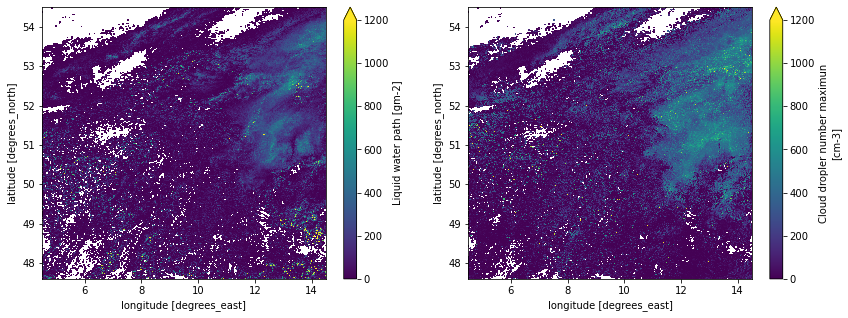

In [68]:
fig = plt.figure(figsize=(14, 5))
plt.subplot(121)
ds.lwp.where(ds.lwp != 0).plot(vmax=1200)
plt.subplot(122)
ds.Nd_max.where(ds.Nd_max != 0).plot(vmax=1200) 

In [54]:
from scipy.signal import savgol_filter

# Plot the data
wl = np.arange(1, 590, 1)
wl
    
print(len(wl))

X = ds.Nd_max.values  
np.shape(X)

589


(628, 589)

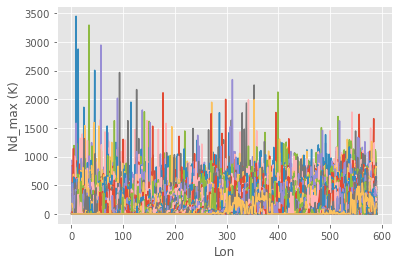

In [57]:
with plt.style.context('ggplot'):
    plt.plot(wl, X[:].T)  #only for showing 50 points
    plt.xlabel("Lon")
    plt.ylabel("Nd_max (cm-3)")

In [59]:
ds.hus.shape

(150, 628, 589)

In [62]:
np.shape(ds.hus.values.reshape(-1, ds.hus.values.shape[0]) )

(369892, 150)

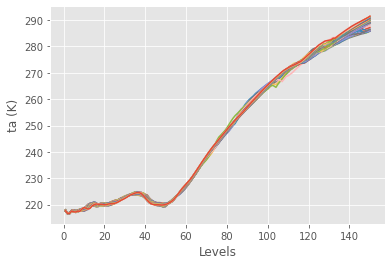

In [64]:
var = ds.ta.values
var = var.transpose(1,2,0) #lat,lot,heigh
X = var.reshape(-1, var.shape[2])   #df_x_train [f"{key}_{i}" for i in range(150)]
wl = np.arange(1, 151, 1)

with plt.style.context('ggplot'):
    plt.plot(wl, X[:50].T)  #only for showing 50 points
    plt.xlabel("Levels")
    plt.ylabel("ta (K)")

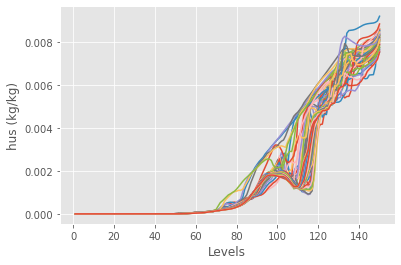

In [65]:
var = ds.hus.values
var = var.transpose(1,2,0) #lat,lot,heigh
X = var.reshape(-1, var.shape[2])   #df_x_train [f"{key}_{i}" for i in range(150)]
wl = np.arange(1, 151, 1)

with plt.style.context('ggplot'):
    plt.plot(wl, X[:50].T)  #only for showing 50 points
    plt.xlabel("Levels")
    plt.ylabel("hus (kg/kg)")

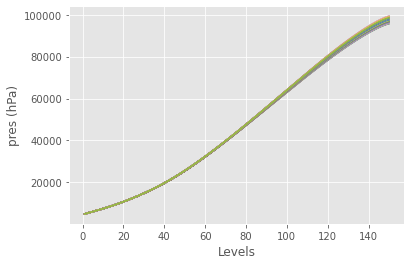

In [67]:
var = ds.pres.values
var = var.transpose(1,2,0) #lat,lot,heigh
X = var.reshape(-1, var.shape[2])   #df_x_train [f"{key}_{i}" for i in range(150)]
wl = np.arange(1, 151, 1)

with plt.style.context('ggplot'):
    plt.plot(wl, X[:90].T)  #only for showing 50 points
    plt.xlabel("Levels")
    plt.ylabel("pres (hPa)")

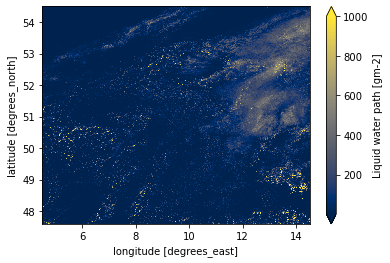

In [18]:
ds.lwp.plot(cmap = "cividis",vmin=1, vmax = 1000)

(array([10952641.,  6758752.,  5357135.,  4762983.,  4553886.,  4483375.,
         4436222.,  4707007.,  5295659.,  4176140.]),
 array([  4933.3687,  14806.1455,  24678.922 ,  34551.7   ,  44424.473 ,
         54297.25  ,  64170.027 ,  74042.805 ,  83915.58  ,  93788.36  ,
        103661.13  ], dtype=float32),
 <BarContainer object of 10 artists>)

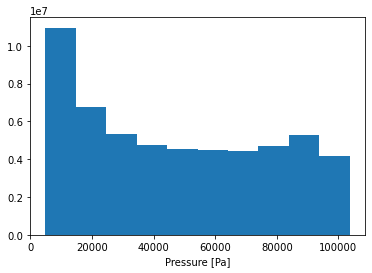

In [7]:
ds.pres.plot()

(array([5.5337365e+07, 1.4338500e+05, 2.7400000e+03, 2.1000000e+02,
        6.1000000e+01, 2.1000000e+01, 7.0000000e+00, 4.0000000e+00,
        3.0000000e+00, 4.0000000e+00]),
 array([   0.        ,  344.67592072,  689.35184145, 1034.02776217,
        1378.7036829 , 1723.37960362, 2068.05552435, 2412.73144507,
        2757.40736579, 3102.08328652, 3446.75920724]),
 <BarContainer object of 10 artists>)

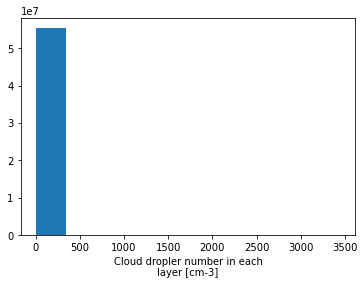

In [28]:
ds.Nd.plot()

In [11]:
import plotly.express as px

fig = px.box(ds.Nd_max.values.flatten, y='Nd_max')

fig.show()

ValueError: DataFrame constructor not properly called!

In [ ]:
fig = px.histogram(df_x_train[df_x_train['Nd_max']>100 & df_x_train['Nd_max']<2000], x='Nd_max')
fig.show()